# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [3]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [10]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import collections
# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray
from skimage.color import hsv2rgb


def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

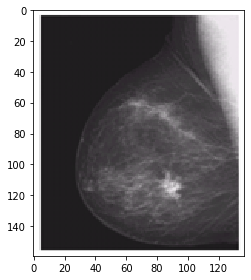

C:\Users\Mohamed\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


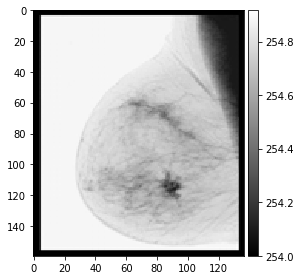

In [4]:
'''
1
Negative Transformation
'''
# Ex: imread and imshow 
mImage = io.imread('imgs/Picture1.png')
io.imshow(mImage)
io.show()

mImage=rgb2gray(mImage)
Dim=np.shape(mImage)
M=Dim[0]
N=Dim[1]
for i in range(M):
    for j in range(N):
        mImage[i][j]=255-mImage[i][j]
mImage=rgb2gray(mImage)
io.imshow(mImage,cmap="gray")
io.show()




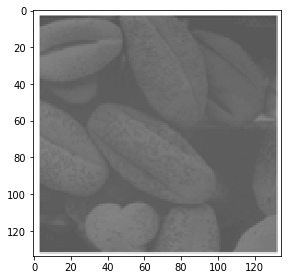

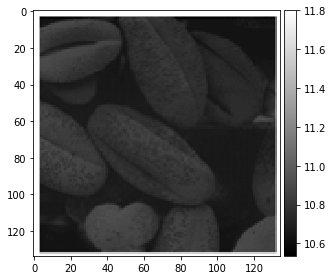

In [31]:
'''
2
Contrast Enhancement
'''
mImage = io.imread('imgs/Picture2.png')

mImage=rgb2gray(mImage)
io.imshow(mImage)
io.show()
Dim=np.shape(mImage)
M=Dim[0]
N=Dim[1]
m=1.8

for i in range(M):
    for j in range(N):
        if mImage[i][j] <= 50 :
            mImage[i][j]=m*mImage[i][j]+10
mImage=rgb2gray(mImage)
io.imshow(mImage,cmap="gray")
io.show()



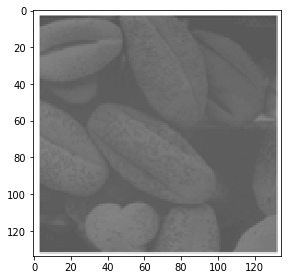

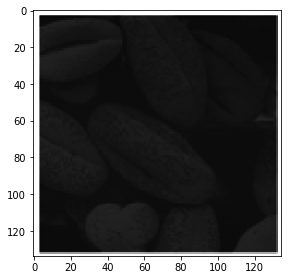

In [32]:
'''
3
Gamma Correction
'''


mImage = io.imread('imgs/Picture2.png')

mImage=rgb2gray(mImage)
io.imshow(mImage)
io.show()
Dim=np.shape(mImage)
M=Dim[0]
N=Dim[1]
mPic=mImage
c=1
gamma=3

for i in range(M):
    for j in range(N):
        mPic[i][j]=c*mImage[i][j]**gamma
mPic=rgb2gray(mPic)
io.imshow(mPic)
io.show()





2123
2123
239
317
2123
2123
2123


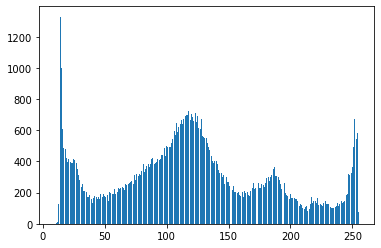

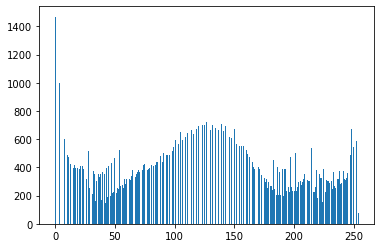

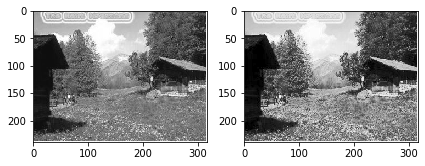

In [37]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
from skimage.exposure import histogram
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1], histogramImg[0], width=0.8, align='center')
    
def histogramfn(image):
    HistoImg = histogram(image)
    showHist(image, HistoImg)

def HisoGramEqualization(Image):  
    output=rgb2gray(Image)
    Image=rgb2gray(Image)
    output = (output*255).astype(np.uint8)
    histogramfn(output) # Before Equilization 
    AccumlativeProb=[]
    NewPixelValue=[]
    maxGrayLevel=255 
    NumberOfPixels=[]
    Dim=np.shape(Image)
    M=Dim[0]
    N=Dim[1]
    for Index in range (256):
        count =0
        for i in range(M):
            for j in range(N):
                if output[i][j] == Index :
                    count=count+1
        NumberOfPixels.append(count)
    SumOfPixels=sum(NumberOfPixels)
    for i in range(256):
        AccumlativeProb.append(sum(NumberOfPixels[0:i])/SumOfPixels)
        NewPixelValue.append((int)(AccumlativeProb[i]*(maxGrayLevel)))
    for i in range(M):
         for j in range(N):
                #print(output[i][j],"=>",NewPixelValue[output[i][j]])  
                output[i][j]=NewPixelValue[output[i][j]]
    histogramfn(output)
    io.show()
    plt.subplot(1,2,1)
    io.imshow(Image,cmap="gray")
    plt.subplot(1,2,2)
    io.imshow(output)
    io.show()
r = io.imread('2.jpg')
HisoGramEqualization(r) 

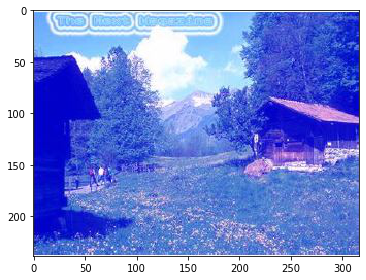

(239, 317, 3)
(239, 317)
239
317


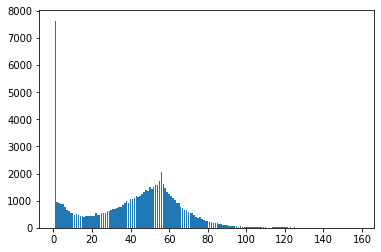

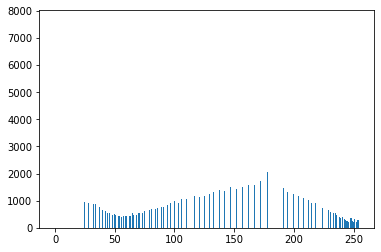

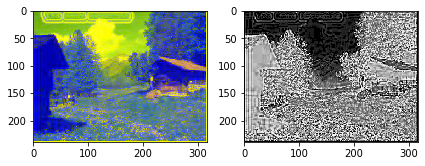

In [48]:
'''
Bonus by Histogram
'''

def HisoGramEqualization2(Image):  
    output=Image[..., 2] 
    print(np.shape(Image))
    print(np.shape(output))
    output = (output*255).astype(np.uint8)
    histogramfn(output) # Before Equilization 
    AccumlativeProb=[]
    NewPixelValue=[]
    maxGrayLevel=255 
    NumberOfPixels=[]
    Dim=np.shape(Image)
    M=Dim[0]
    N=Dim[1]
    print(M)
    print(N)
    for Index in range (256):
        count =0
        for i in range(M):
            for j in range(N):
                if output[i][j] == Index :
                    count=count+1
        NumberOfPixels.append(count)
    SumOfPixels=sum(NumberOfPixels)
    for i in range(256):
        AccumlativeProb.append(sum(NumberOfPixels[0:i])/SumOfPixels)
        NewPixelValue.append((int)(AccumlativeProb[i]*(maxGrayLevel)))
    for i in range(M):
         for j in range(N):
                #print(output[i][j],"=>",NewPixelValue[output[i][j]])  
                output[i][j]=NewPixelValue[output[i][j]]
    histogramfn(output)
    io.show()
    plt.subplot(1,2,1)
    Image[..., 2] =output
    io.imshow(Image)
    plt.subplot(1,2,2)
    io.imshow(output)
    io.show()
r = io.imread('2.jpg')
io.imshow(r)
io.show()
HisoGramEqualization2(r) 

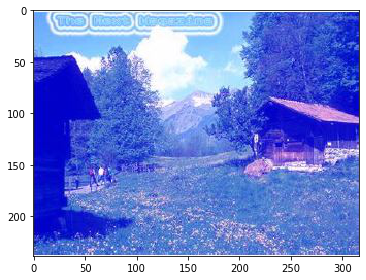

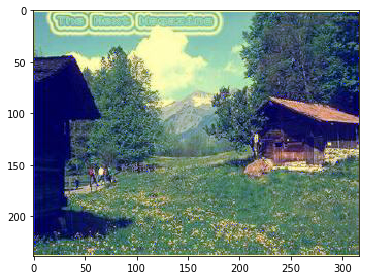

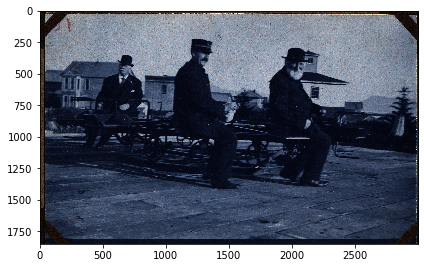

In [95]:
'''
Bonus 
Gamma Correction
'''



def BlueGammaCorrection(mImage,gammaVal):
    output=mImage[..., 2]
    io.imshow(mImage)
    io.show()
    Dim=np.shape(mImage)
    M=Dim[0]
    N=Dim[1]
    mPic=output
    c=1
    gamma=gammaVal

    for i in range(M):
        for j in range(N):
            mPic[i][j]=c*output[i][j]**gamma
    mImage[..., 2]=mPic
    io.imshow(mImage)
    io.show()

mImage = io.imread('2.jpg')
mImage1 = io.imread('1.jpg')
BlueGammaCorrection(mImage,1.1)
#BlueGammaCorrection(mImage1,0.9)
hsvImg=rgb2hsv(mImage1)

hue_img = hsvImg[:, :, 0]
hue_img = hue_img
blueLIST=[]

c=1
gamma=3
for i in range (np.shape(hue_img)[0]):
    for j in range (np.shape(hue_img)[1]):
        
        if hue_img[i][j] >= (120.0)/360 and hue_img[i][j]  <180/360:
            blueLIST.append(hue_img[i][j])
        hsvImg[i][j][2]=hsvImg[i][j][2]**gamma
#print(blueLIST)
hsvImg[:, :, 0]=hue_img
img = hsv2rgb(hsvImg)
io.imshow(img)
io.show()
